In [ ]:
seaborn是一个对matplotlib进行了二次封装的包. 提供很多快捷方便的绘图函数, 可以画出更加直观,更加好看,更加高效的图.

In [ ]:
pyecharts

In [3]:
%matplotlib inline 
#jupyter notebook 中的魔法函数，如果不是使用该软件请使用plt.show()用于显示图像
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 定义一个含偏移的正弦图像，来比较传统的matplotlib和seaborn的不同
def sinplot(flip=1):
    x = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x,np.sin(x+i*.5)*(7-i)*flip)

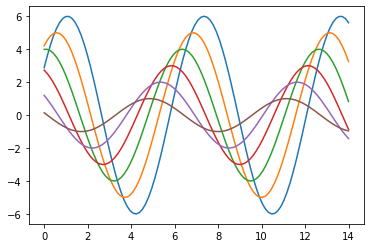

In [5]:
# 使用matplotlib默认设置的图形效果
sinplot()

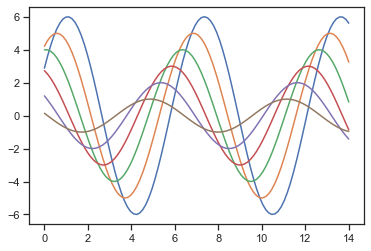

In [12]:
import seaborn as sns
# 设置默认风格
# seaborn默认的灰色网格底色灵感来源于matplotlib却更加柔和。
# sns.set()
sns.set_style('ticks')
sinplot()

有5个seaborn的主题，适用于不同的应用和人群偏好：

darkgrid 黑色网格（默认）
whitegrid 白色网格
dark 黑色背景
white 白色背景
ticks 有刻度线的白背景

<AxesSubplot:>

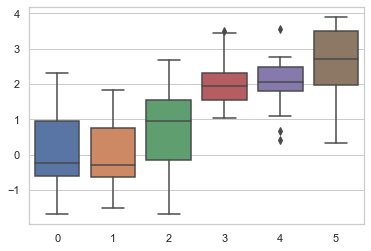

In [15]:
# 白色网格
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data)

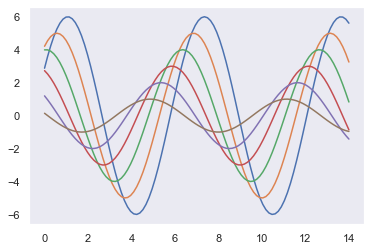

In [6]:
# 没有网格
sns.set_style("dark")
sinplot()

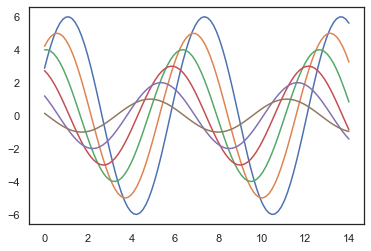

In [7]:
# 白色背景
sns.set_style("white")
sinplot()

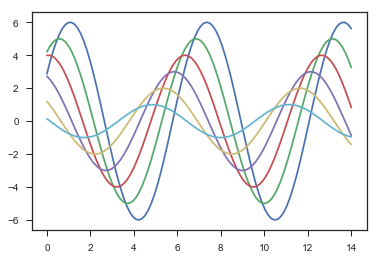

In [12]:
# 加了刻度
sns.set_style("ticks")
sinplot()

### 用despine()进行边框控制

white和ticks参数的样式，都可以删除上方和右方坐标轴上不需要的边框，这在matplotlib中是无法通过参数实现的，却可以在seaborn中通过despine()函数轻松移除他们。

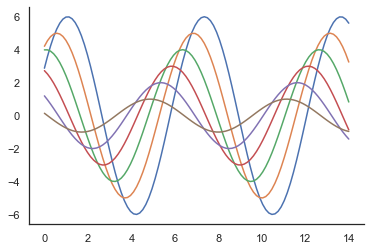

In [13]:
sns.set_style("white")
sinplot() 
# 默认无参数状态，就是删除上方和右方的边框
sns.despine()

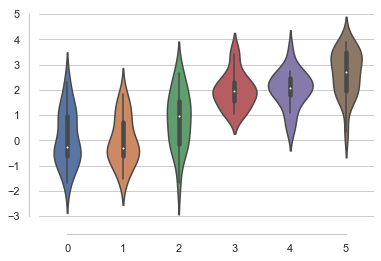

In [21]:
f, ax = plt.subplots()
sns.violinplot(data=data)
# offset 两坐标轴离开的距离
sns.despine(offset=10, trim=True)

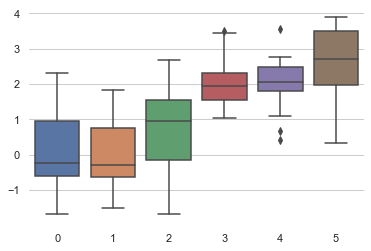

In [22]:
# 也可以通过往despine()中添加参数去控制边框
sns.set_style('whitegrid')
sns.boxplot(data=data, palette='deep')
sns.despine(left=True, bottom=True) # 删除左边边框


### 临时设定图形样式

sns也允许用with语句中套用axes_style()达到临时设置参数的效果（仅对with块内的绘图函数起作用）。这也允许创建不同风格的坐标轴。

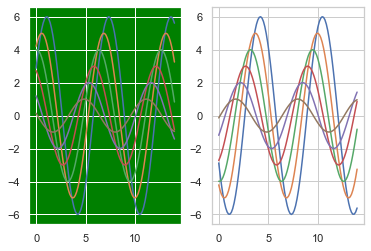

In [24]:
f = plt.figure()
#axes_style设置子图的风格
with sns.axes_style("darkgrid", {'axes.facecolor': 'green'}):
    ax = f.add_subplot(1, 2, 1)
    sinplot()
ax = f.add_subplot(1, 2, 2)
sinplot(-1)

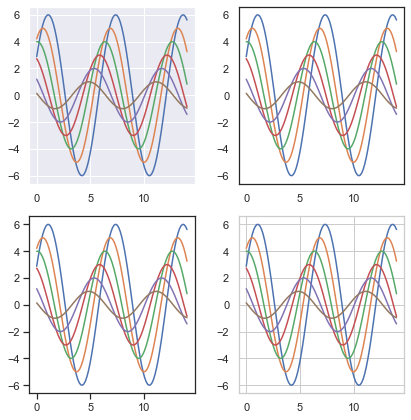

In [23]:
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sinplot()

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sinplot()

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])
    sinplot()

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sinplot()

f.tight_layout()

In [23]:
# 显示当前的参数配置,传入字典,可以修改这些参数
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.linewidth': 1.0,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.major.size': 0.0,
 'ytick.major.size': 0.0,
 'xtick.minor.size': 0.0,
 'ytick.minor.size': 0.0,
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif']}

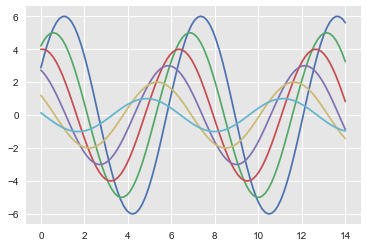

In [24]:
# 背景颜色更淡一些了.
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()

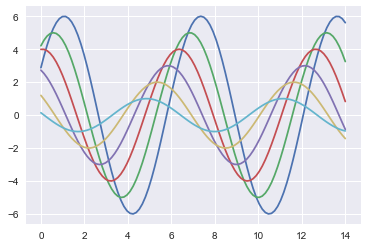

In [25]:
sns.set_style("darkgrid")
sinplot()

### 通过 plotting_context() 和 set_context() 调整绘图元素大小

In [25]:
# 通过sns.set()重置参数
sns.set()

四种预设，按相对尺寸的顺序(线条越来越粗)，分别是paper，notebook, talk, and poster。notebook的样式是默认的，上面的绘图都是使用默认的notebook预设

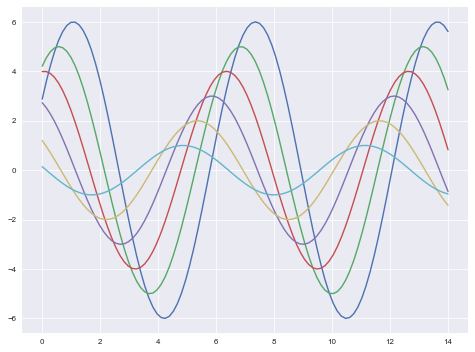

In [27]:
sns.set_context('paper')
plt.figure(figsize=(8,6))
sinplot()

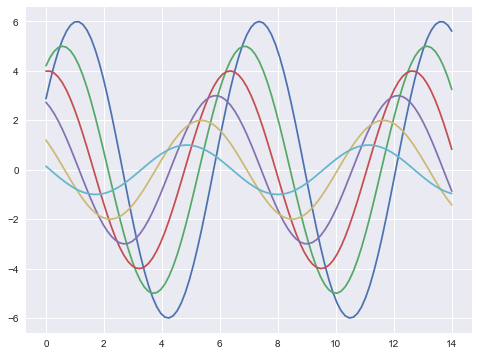

In [28]:
# default 默认设置
sns.set_context("notebook")
plt.figure(figsize=(8,6))
sinplot()

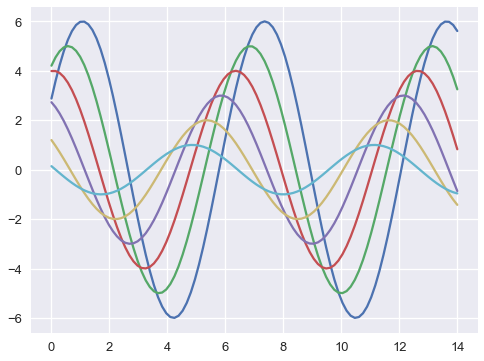

In [29]:
# 线稍微粗一些.
sns.set_context("talk")
plt.figure(figsize=(8,6))
sinplot()

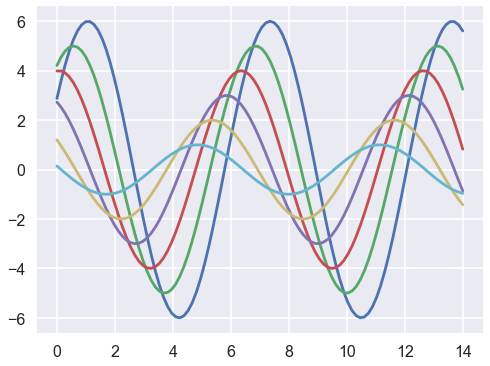

In [30]:
# 海报,字更大
sns.set_context("poster")
plt.figure(figsize=(8,6))
sinplot()

还可以使用其中一个名称来调用set_context()来设置参数，您可以通过提供参数值的字典来覆盖参数。

通过更改context还可以独立地扩展字体元素的大小。(这个选项也可以通过顶级set()函数获得）

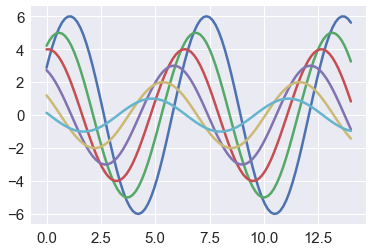

In [31]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()